# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


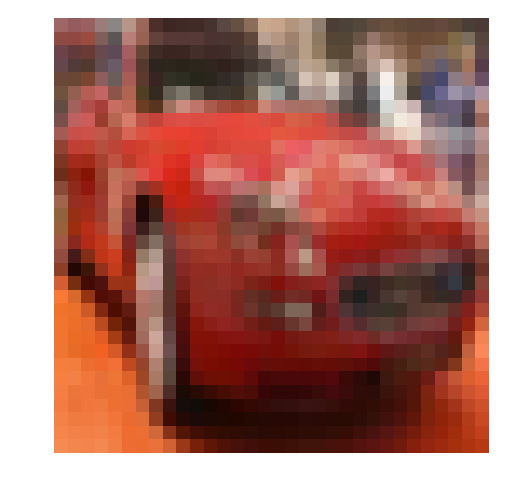

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 6:
Image - Min Value: 7 Max Value: 249
Image - Shape: (32, 32, 3)
Label - Label Id: 2 Name: bird


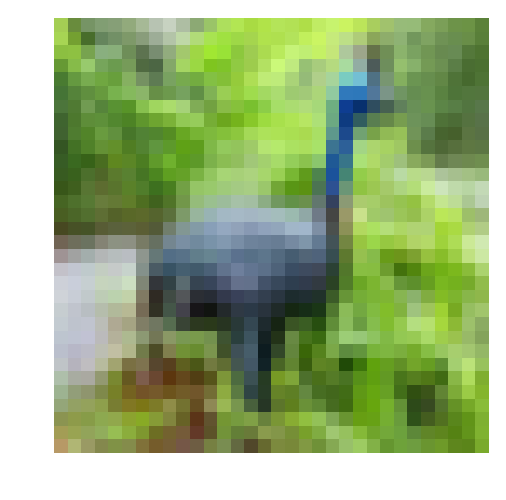

In [3]:
# Explore the dataset
batch_id = 1
sample_id = 6
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 10:
Image - Min Value: 4 Max Value: 231
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


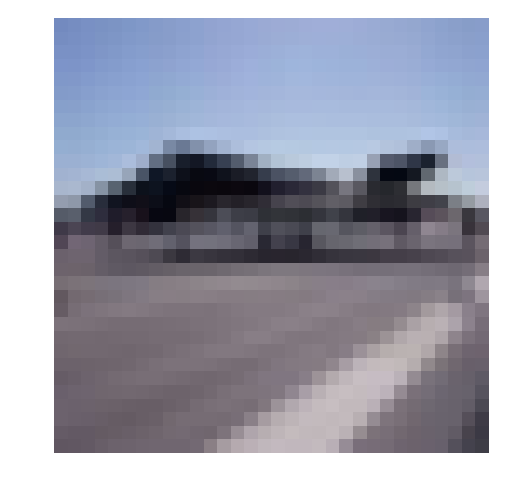

In [4]:
# Explore the dataset
batch_id = 2
sample_id = 10
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 20:
Image - Min Value: 26 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 5 Name: dog


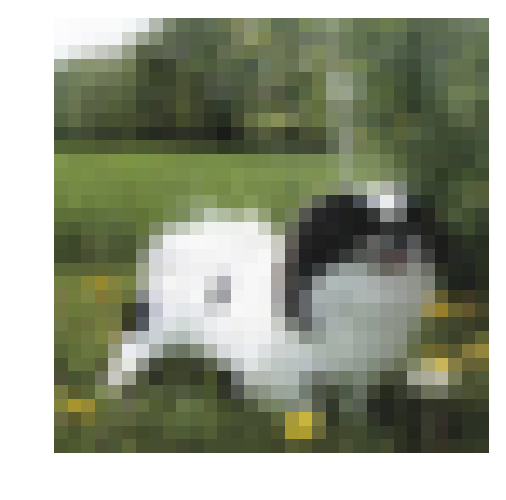

In [5]:
# Explore the dataset
batch_id = 3
sample_id = 20
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

* What are all possible labels? numbers between 0 and 9, 
* what is the range of values for the image data? 0-255, 
* Are the labels in order or random? Random.
* Classes seem balanced


## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [6]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    normalized_data = (x-np.min(x))/np.ptp(x)#(x - min(x)) / (max(x)-min(x))
    return normalized_data


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)


Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [7]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    from sklearn import preprocessing
    encoder = preprocessing.LabelBinarizer()
    encoder.fit([0,1,2,3,4,5,6,7,8,9])
    
    return encoder.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [10]:
#preview features
valid_features

array([[[[ 0.54901961,  0.49019608,  0.45098039],
         [ 0.57254902,  0.50980392,  0.47843137],
         [ 0.56078431,  0.49803922,  0.47843137],
         ..., 
         [ 0.66666667,  0.56862745,  0.51372549],
         [ 0.69019608,  0.58823529,  0.5254902 ],
         [ 0.66666667,  0.57647059,  0.52156863]],

        [[ 0.4745098 ,  0.42352941,  0.50588235],
         [ 0.50980392,  0.4627451 ,  0.54509804],
         [ 0.5254902 ,  0.4745098 ,  0.56078431],
         ..., 
         [ 0.63921569,  0.55294118,  0.61568627],
         [ 0.66666667,  0.57254902,  0.63137255],
         [ 0.66666667,  0.58039216,  0.63137255]],

        [[ 0.59607843,  0.54509804,  0.68235294],
         [ 0.61568627,  0.56862745,  0.70196078],
         [ 0.60784314,  0.56078431,  0.68627451],
         ..., 
         [ 0.69411765,  0.60392157,  0.75686275],
         [ 0.70980392,  0.61176471,  0.76078431],
         [ 0.71764706,  0.62745098,  0.76078431]],

        ..., 
        [[ 0.49019608,  0.43137255,

In [11]:
#preview labels
valid_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [12]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape = (None,image_shape[0],image_shape[1],image_shape[2]),name = "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,shape = (None,n_classes), name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [13]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    convolution_output_depth = conv_num_outputs
    convolution_input_depth = x_tensor.get_shape().as_list()[3]
    convolution_kernel_height = conv_ksize[0]
    convolution_kernel_width = conv_ksize[1]
    convolution_height_stride = conv_strides[0]
    convolution_width_stride = conv_strides[1]
    pool_kernel_height = pool_ksize[0]
    pool_kernel_width = pool_ksize[1]
    pool_height_stride = pool_strides[0]
    pool_width_stride = pool_strides[1]

    convolution_weights = tf.Variable(tf.truncated_normal([convolution_kernel_height,convolution_kernel_width,convolution_input_depth,convolution_output_depth],stddev=0.01))
    convolution_bias = tf.Variable(tf.zeros([convolution_output_depth]))
    convolution = tf.nn.conv2d(x_tensor,  convolution_weights,strides = [1,convolution_height_stride,convolution_width_stride,1],padding = "SAME")
    convolution = tf.nn.bias_add(convolution,convolution_bias)
    convolution = tf.nn.relu(convolution)
    max_pool = tf.nn.max_pool(convolution,ksize=[1,pool_kernel_height,pool_kernel_width,1],strides=[1,pool_height_stride,pool_width_stride ,1],padding="SAME")
    return max_pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [14]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    tensor_shape = x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor,(-1,tensor_shape[1]*tensor_shape[2]*tensor_shape[3]))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [15]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    tensor_shape = x_tensor.get_shape().as_list()
    fully_connected_weights  = tf.Variable(tf.truncated_normal([tensor_shape[1],num_outputs],stddev=0.01))
    fully_connected_bias = tf.Variable(tf.zeros([num_outputs]))
    
    return tf.nn.relu( tf.add(tf.matmul(x_tensor,fully_connected_weights),fully_connected_bias))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [16]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    tensor_shape = x_tensor.get_shape().as_list()
    fully_connected_weights  = tf.Variable(tf.truncated_normal([tensor_shape[1],num_outputs]))
    fully_connected_bias = tf.Variable(tf.zeros([num_outputs]))
    return tf.add(tf.matmul(x_tensor,fully_connected_weights),fully_connected_bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [38]:
def conv_net(x, keep_prob):
    with tf.device("/gpu:0"):
        """
        Create a convolutional neural network model
        : x: Placeholder tensor that holds image data.
        : keep_prob: Placeholder tensor that hold dropout keep probability.
        : return: Tensor that represents logits
        """
        # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
        #    Play around with different number of outputs, kernel size and stride
        # Function Definition from Above:
        #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
        network = conv2d_maxpool(x,32,[4,4],[1,1],[4,4],[2,2])
        network = tf.nn.dropout(network,keep_prob)
        network = conv2d_maxpool(network,128,[6,6],[1,1],[4,4],[2,2])
        network = tf.nn.dropout(network,keep_prob)
        network = conv2d_maxpool(network,256,[8,8],[1,1],[4,4],[2,2])
        network = tf.nn.dropout(network,keep_prob)
        # TODO: Apply a Flatten Layer
        # Function Definition from Above:
        #   flatten(x_tensor)
        network = flatten(network)
        #network = tf.nn.dropout(network,keep_prob)

        # TODO: Apply 1, 2, or 3 Fully Connected Layers
        #    Play around with different number of outputs
        # Function Definition from Above:
        #   fully_conn(x_tensor, num_outputs)
        network = fully_conn(network,10)
        #network = tf.nn.dropout(network,keep_prob)
        network = fully_conn(network,10)
        #network = tf.nn.dropout(network,keep_prob)
        #network = fully_conn(network,256)
        #network = fully_conn(network,128)
        #network = tf.nn.dropout(network,keep_prob)

        # TODO: Apply an Output Layer
        #    Set this to the number of classes
        # Function Definition from Above:
        #   output(x_tensor, num_outputs)
        network = output(network,10)
    
    # TODO: return output
    return network


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [18]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    feed_dict = {x:feature_batch,y:label_batch,keep_prob:keep_probability}
    optimizer = session.run(optimizer,feed_dict=feed_dict)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [19]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    val_feed_dict = {x:valid_features,y:valid_labels,keep_prob:1.0}
    train_feed_dict = {x:feature_batch,y:label_batch,keep_prob:1.0}
    val_cost = session.run(cost,feed_dict=val_feed_dict)
    val_accuracy = session.run(accuracy,feed_dict=val_feed_dict)
    train_cost = session.run(cost,feed_dict=train_feed_dict)
    train_accuracy = session.run(accuracy,feed_dict=train_feed_dict)
    print("train Cost",train_cost,"train accuracy",train_accuracy)
    print("val Cost",val_cost,"val accuracy",val_accuracy)

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [41]:
# TODO: Tune Parameters
epochs = 150
batch_size = 1024
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [42]:
import time
start = time.clock()
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
print("time",time.clock()-start)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  train Cost 2.28548 train accuracy 0.149752
val Cost 2.2855 val accuracy 0.1436
Epoch  2, CIFAR-10 Batch 1:  train Cost 2.25918 train accuracy 0.141089
val Cost 2.26268 val accuracy 0.1348
Epoch  3, CIFAR-10 Batch 1:  train Cost 2.23327 train accuracy 0.138614
val Cost 2.23924 val accuracy 0.1306
Epoch  4, CIFAR-10 Batch 1:  train Cost 2.20395 train accuracy 0.153465
val Cost 2.20716 val accuracy 0.15
Epoch  5, CIFAR-10 Batch 1:  train Cost 2.19917 train accuracy 0.15099
val Cost 2.19146 val accuracy 0.1612
Epoch  6, CIFAR-10 Batch 1:  train Cost 2.18378 train accuracy 0.183168
val Cost 2.14987 val accuracy 0.185
Epoch  7, CIFAR-10 Batch 1:  train Cost 2.13988 train accuracy 0.206683
val Cost 2.1203 val accuracy 0.1956
Epoch  8, CIFAR-10 Batch 1:  train Cost 2.11667 train accuracy 0.201733
val Cost 2.10697 val accuracy 0.191
Epoch  9, CIFAR-10 Batch 1:  train Cost 2.08661 train accuracy 0.210396
val Cost 2.07872 val

Epoch 76, CIFAR-10 Batch 1:  train Cost 0.733522 train accuracy 0.743812
val Cost 1.23275 val accuracy 0.5632
Epoch 77, CIFAR-10 Batch 1:  train Cost 0.750356 train accuracy 0.735149
val Cost 1.26491 val accuracy 0.5578
Epoch 78, CIFAR-10 Batch 1:  train Cost 0.689232 train accuracy 0.757426
val Cost 1.22632 val accuracy 0.566
Epoch 79, CIFAR-10 Batch 1:  train Cost 0.69165 train accuracy 0.766089
val Cost 1.24449 val accuracy 0.5648
Epoch 80, CIFAR-10 Batch 1:  train Cost 0.660031 train accuracy 0.782178
val Cost 1.2319 val accuracy 0.5734
Epoch 81, CIFAR-10 Batch 1:  train Cost 0.656029 train accuracy 0.77104
val Cost 1.23766 val accuracy 0.5768
Epoch 82, CIFAR-10 Batch 1:  train Cost 0.615874 train accuracy 0.795792
val Cost 1.22876 val accuracy 0.578
Epoch 83, CIFAR-10 Batch 1:  train Cost 0.610153 train accuracy 0.793317
val Cost 1.22758 val accuracy 0.5774
Epoch 84, CIFAR-10 Batch 1:  train Cost 0.598007 train accuracy 0.793317
val Cost 1.23369 val accuracy 0.5782
Epoch 85, CIFAR

### Experiment results
* 100 epoch,512 batch size, 2 convolutions, 2 fully connected, no dropout:train Cost 3317.09 train accuracy 0.760135 val Cost 27927.9 val accuracy 0.4018
* 20 epoch,96 batch size, 3 convolutions, 1 fully connected 512 unnits, no dropout:train Cost 225.305 train accuracy 0.958333
val Cost 54559.4 val accuracy 0.4438
* 20 epoch,96 batch size, 3 convolutions, 1 fully connected 512 unnits, 0.6 dropout before last layer(after fully connected): after 10 batches it plateaus to train Cost 2.24019 train accuracy 0.125
val Cost 151.769 val accuracy 0.106
* same parameters as previous experiment but with dropout after last convolution and before fully connected: started with high values (35 and 30 percent accuracy on first epoch but then dropped to las than 10% for the first 10 epochs)
* 20 epoch,96 batch size, 3 convolutions, 2 fully connected 512 unnits: it overfits, in epoch 25 train acc is 94% but validation is 41%
* same as the last one but with  2 dropouts, one after first convolution and one between fully connected (0.5 keep prob): after 10 epochs, it didnt improved (less than 0.7)
--------------------------------------------------------------
    512 batch, keep_prob = 0.5, 45 epochs
    network = conv2d_maxpool(x,32,[3,3],[1,1],[2,2],[2,2])
    #network = tf.nn.dropout(network,keep_prob)
    network = conv2d_maxpool(network,32,[3,3],[2,2],[2,2],[2,2])
    network = conv2d_maxpool(network,64,[3,3],[1,1],[2,2],[2,2])
    #network = tf.nn.dropout(network,keep_prob)
    network = flatten(network)
    #network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    didnt improved, of 0.1
-----------------------------------------------------------------------------------
    512 batch, keep_prob = 0.5, 45 epochs
    network = conv2d_maxpool(x,32,[3,3],[1,1],[2,2],[2,2])
    network = conv2d_maxpool(network,32,[3,3],[2,2],[2,2],[2,2])
    network = conv2d_maxpool(network,64,[3,3],[1,1],[2,2],[2,2])
    network = flatten(network)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,128)
    network = tf.nn.dropout(network,keep_prob)
    after giving a smaller stdv to weights initialization, it got good results! 0.8 on trian and 0.55 on validation!
-----------------------------------------------------------------------------------

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [43]:
start = time.clock()
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
print("time:",time.clock()-start)

Training...
Epoch  1, CIFAR-10 Batch 1:  train Cost 2.3018 train accuracy 0.102723
val Cost 2.3019 val accuracy 0.112
Epoch  1, CIFAR-10 Batch 2:  train Cost 2.30111 train accuracy 0.131188
val Cost 2.30118 val accuracy 0.1214
Epoch  1, CIFAR-10 Batch 3:  train Cost 2.2875 train accuracy 0.0866337
val Cost 2.29402 val accuracy 0.0832
Epoch  1, CIFAR-10 Batch 4:  train Cost 2.27469 train accuracy 0.131188
val Cost 2.27472 val accuracy 0.1384
Epoch  1, CIFAR-10 Batch 5:  train Cost 2.23848 train accuracy 0.0990099
val Cost 2.24318 val accuracy 0.0924
Epoch  2, CIFAR-10 Batch 1:  train Cost 2.23632 train accuracy 0.12995
val Cost 2.22263 val accuracy 0.123
Epoch  2, CIFAR-10 Batch 2:  train Cost 2.21584 train accuracy 0.144802
val Cost 2.21357 val accuracy 0.1446
Epoch  2, CIFAR-10 Batch 3:  train Cost 2.19738 train accuracy 0.168317
val Cost 2.19923 val accuracy 0.1604
Epoch  2, CIFAR-10 Batch 4:  train Cost 2.19204 train accuracy 0.144802
val Cost 2.18888 val accuracy 0.1578
Epoch  2, C

Epoch 16, CIFAR-10 Batch 2:  train Cost 1.24939 train accuracy 0.570545
val Cost 1.26639 val accuracy 0.5454
Epoch 16, CIFAR-10 Batch 3:  train Cost 1.24146 train accuracy 0.554455
val Cost 1.34164 val accuracy 0.5304
Epoch 16, CIFAR-10 Batch 4:  train Cost 1.1972 train accuracy 0.586634
val Cost 1.26324 val accuracy 0.5502
Epoch 16, CIFAR-10 Batch 5:  train Cost 1.15626 train accuracy 0.59901
val Cost 1.23177 val accuracy 0.5616
Epoch 17, CIFAR-10 Batch 1:  train Cost 1.16622 train accuracy 0.585396
val Cost 1.23292 val accuracy 0.5668
Epoch 17, CIFAR-10 Batch 2:  train Cost 1.20029 train accuracy 0.602723
val Cost 1.22008 val accuracy 0.5726
Epoch 17, CIFAR-10 Batch 3:  train Cost 1.16436 train accuracy 0.582921
val Cost 1.26794 val accuracy 0.5536
Epoch 17, CIFAR-10 Batch 4:  train Cost 1.15648 train accuracy 0.594059
val Cost 1.22264 val accuracy 0.5644
Epoch 17, CIFAR-10 Batch 5:  train Cost 1.12102 train accuracy 0.602723
val Cost 1.21384 val accuracy 0.5668
Epoch 18, CIFAR-10 Ba

Epoch 31, CIFAR-10 Batch 2:  train Cost 0.849542 train accuracy 0.725248
val Cost 0.981782 val accuracy 0.6672
Epoch 31, CIFAR-10 Batch 3:  train Cost 0.816782 train accuracy 0.707921
val Cost 1.03182 val accuracy 0.6596
Epoch 31, CIFAR-10 Batch 4:  train Cost 0.822413 train accuracy 0.712871
val Cost 0.984519 val accuracy 0.6676
Epoch 31, CIFAR-10 Batch 5:  train Cost 0.808926 train accuracy 0.738861
val Cost 1.01185 val accuracy 0.66
Epoch 32, CIFAR-10 Batch 1:  train Cost 0.81952 train accuracy 0.69802
val Cost 1.00429 val accuracy 0.6516
Epoch 32, CIFAR-10 Batch 2:  train Cost 0.837586 train accuracy 0.72896
val Cost 0.973931 val accuracy 0.6694
Epoch 32, CIFAR-10 Batch 3:  train Cost 0.823633 train accuracy 0.721535
val Cost 1.03995 val accuracy 0.653
Epoch 32, CIFAR-10 Batch 4:  train Cost 0.801719 train accuracy 0.720297
val Cost 0.967511 val accuracy 0.6716
Epoch 32, CIFAR-10 Batch 5:  train Cost 0.785236 train accuracy 0.743812
val Cost 0.984425 val accuracy 0.6716
Epoch 33, C

Epoch 46, CIFAR-10 Batch 2:  train Cost 0.588282 train accuracy 0.820545
val Cost 0.862953 val accuracy 0.709
Epoch 46, CIFAR-10 Batch 3:  train Cost 0.606404 train accuracy 0.789604
val Cost 0.927181 val accuracy 0.6962
Epoch 46, CIFAR-10 Batch 4:  train Cost 0.601644 train accuracy 0.804455
val Cost 0.871599 val accuracy 0.7084
Epoch 46, CIFAR-10 Batch 5:  train Cost 0.568754 train accuracy 0.810644
val Cost 0.882799 val accuracy 0.7072
Epoch 47, CIFAR-10 Batch 1:  train Cost 0.562857 train accuracy 0.810644
val Cost 0.887741 val accuracy 0.704
Epoch 47, CIFAR-10 Batch 2:  train Cost 0.608194 train accuracy 0.79703
val Cost 0.883233 val accuracy 0.7036
Epoch 47, CIFAR-10 Batch 3:  train Cost 0.578711 train accuracy 0.79703
val Cost 0.897747 val accuracy 0.7036
Epoch 47, CIFAR-10 Batch 4:  train Cost 0.578822 train accuracy 0.805693
val Cost 0.850795 val accuracy 0.7096
Epoch 47, CIFAR-10 Batch 5:  train Cost 0.571956 train accuracy 0.805693
val Cost 0.879084 val accuracy 0.7046
Epoch

Epoch 61, CIFAR-10 Batch 1:  train Cost 0.431037 train accuracy 0.85396
val Cost 0.842791 val accuracy 0.7276
Epoch 61, CIFAR-10 Batch 2:  train Cost 0.413239 train accuracy 0.868812
val Cost 0.796847 val accuracy 0.7328
Epoch 61, CIFAR-10 Batch 3:  train Cost 0.437455 train accuracy 0.856436
val Cost 0.830032 val accuracy 0.7274
Epoch 61, CIFAR-10 Batch 4:  train Cost 0.407941 train accuracy 0.862624
val Cost 0.813843 val accuracy 0.7388
Epoch 61, CIFAR-10 Batch 5:  train Cost 0.376853 train accuracy 0.886139
val Cost 0.783506 val accuracy 0.749
Epoch 62, CIFAR-10 Batch 1:  train Cost 0.385723 train accuracy 0.876238
val Cost 0.817586 val accuracy 0.7392
Epoch 62, CIFAR-10 Batch 2:  train Cost 0.405001 train accuracy 0.872525
val Cost 0.797614 val accuracy 0.7356
Epoch 62, CIFAR-10 Batch 3:  train Cost 0.436482 train accuracy 0.84901
val Cost 0.847492 val accuracy 0.7324
Epoch 62, CIFAR-10 Batch 4:  train Cost 0.417054 train accuracy 0.857673
val Cost 0.813822 val accuracy 0.7336
Epoc

Epoch 75, CIFAR-10 Batch 5:  train Cost 0.31173 train accuracy 0.903465
val Cost 0.790037 val accuracy 0.7488
Epoch 76, CIFAR-10 Batch 1:  train Cost 0.301928 train accuracy 0.908416
val Cost 0.855951 val accuracy 0.738
Epoch 76, CIFAR-10 Batch 2:  train Cost 0.333016 train accuracy 0.894802
val Cost 0.810789 val accuracy 0.743
Epoch 76, CIFAR-10 Batch 3:  train Cost 0.310192 train accuracy 0.899752
val Cost 0.806894 val accuracy 0.7446
Epoch 76, CIFAR-10 Batch 4:  train Cost 0.294685 train accuracy 0.907178
val Cost 0.797596 val accuracy 0.7486
Epoch 76, CIFAR-10 Batch 5:  train Cost 0.332771 train accuracy 0.89604
val Cost 0.838571 val accuracy 0.7332
Epoch 77, CIFAR-10 Batch 1:  train Cost 0.327921 train accuracy 0.894802
val Cost 0.877638 val accuracy 0.7312
Epoch 77, CIFAR-10 Batch 2:  train Cost 0.282733 train accuracy 0.910891
val Cost 0.772461 val accuracy 0.7502
Epoch 77, CIFAR-10 Batch 3:  train Cost 0.301591 train accuracy 0.897277
val Cost 0.810155 val accuracy 0.7506
Epoch

Epoch 90, CIFAR-10 Batch 4:  train Cost 0.215056 train accuracy 0.949257
val Cost 0.783105 val accuracy 0.7534
Epoch 90, CIFAR-10 Batch 5:  train Cost 0.209959 train accuracy 0.945545
val Cost 0.785698 val accuracy 0.7564
Epoch 91, CIFAR-10 Batch 1:  train Cost 0.223921 train accuracy 0.930693
val Cost 0.80249 val accuracy 0.7532
Epoch 91, CIFAR-10 Batch 2:  train Cost 0.241911 train accuracy 0.931931
val Cost 0.803708 val accuracy 0.756
Epoch 91, CIFAR-10 Batch 3:  train Cost 0.224787 train accuracy 0.931931
val Cost 0.813974 val accuracy 0.7542
Epoch 91, CIFAR-10 Batch 4:  train Cost 0.189152 train accuracy 0.960396
val Cost 0.760285 val accuracy 0.7658
Epoch 91, CIFAR-10 Batch 5:  train Cost 0.242102 train accuracy 0.92698
val Cost 0.811568 val accuracy 0.7542
Epoch 92, CIFAR-10 Batch 1:  train Cost 0.210309 train accuracy 0.938119
val Cost 0.801605 val accuracy 0.7586
Epoch 92, CIFAR-10 Batch 2:  train Cost 0.224426 train accuracy 0.935643
val Cost 0.794398 val accuracy 0.7546
Epoc

Epoch 105, CIFAR-10 Batch 3:  train Cost 0.220286 train accuracy 0.929455
val Cost 0.870639 val accuracy 0.751
Epoch 105, CIFAR-10 Batch 4:  train Cost 0.162371 train accuracy 0.964109
val Cost 0.815278 val accuracy 0.7548
Epoch 105, CIFAR-10 Batch 5:  train Cost 0.160912 train accuracy 0.962871
val Cost 0.801383 val accuracy 0.7566
Epoch 106, CIFAR-10 Batch 1:  train Cost 0.186761 train accuracy 0.941832
val Cost 0.784872 val accuracy 0.763
Epoch 106, CIFAR-10 Batch 2:  train Cost 0.165294 train accuracy 0.950495
val Cost 0.796797 val accuracy 0.7644
Epoch 106, CIFAR-10 Batch 3:  train Cost 0.206886 train accuracy 0.941832
val Cost 0.821738 val accuracy 0.7502
Epoch 106, CIFAR-10 Batch 4:  train Cost 0.150743 train accuracy 0.965346
val Cost 0.780904 val accuracy 0.7662
Epoch 106, CIFAR-10 Batch 5:  train Cost 0.158975 train accuracy 0.962871
val Cost 0.779398 val accuracy 0.7592
Epoch 107, CIFAR-10 Batch 1:  train Cost 0.176028 train accuracy 0.95297
val Cost 0.766743 val accuracy 0.

Epoch 120, CIFAR-10 Batch 2:  train Cost 0.141944 train accuracy 0.962871
val Cost 0.779161 val accuracy 0.7694
Epoch 120, CIFAR-10 Batch 3:  train Cost 0.143635 train accuracy 0.966584
val Cost 0.796054 val accuracy 0.7636
Epoch 120, CIFAR-10 Batch 4:  train Cost 0.144781 train accuracy 0.967822
val Cost 0.811495 val accuracy 0.7638
Epoch 120, CIFAR-10 Batch 5:  train Cost 0.149883 train accuracy 0.959158
val Cost 0.829002 val accuracy 0.7576
Epoch 121, CIFAR-10 Batch 1:  train Cost 0.127295 train accuracy 0.980198
val Cost 0.746689 val accuracy 0.7772
Epoch 121, CIFAR-10 Batch 2:  train Cost 0.144661 train accuracy 0.972772
val Cost 0.79092 val accuracy 0.7656
Epoch 121, CIFAR-10 Batch 3:  train Cost 0.159304 train accuracy 0.960396
val Cost 0.802845 val accuracy 0.757
Epoch 121, CIFAR-10 Batch 4:  train Cost 0.118947 train accuracy 0.976485
val Cost 0.770906 val accuracy 0.7694
Epoch 121, CIFAR-10 Batch 5:  train Cost 0.127215 train accuracy 0.97401
val Cost 0.797874 val accuracy 0.

Epoch 135, CIFAR-10 Batch 1:  train Cost 0.0949198 train accuracy 0.981436
val Cost 0.749505 val accuracy 0.778
Epoch 135, CIFAR-10 Batch 2:  train Cost 0.108766 train accuracy 0.980198
val Cost 0.769901 val accuracy 0.7712
Epoch 135, CIFAR-10 Batch 3:  train Cost 0.100412 train accuracy 0.977723
val Cost 0.780993 val accuracy 0.7696
Epoch 135, CIFAR-10 Batch 4:  train Cost 0.0844936 train accuracy 0.987624
val Cost 0.748097 val accuracy 0.779
Epoch 135, CIFAR-10 Batch 5:  train Cost 0.0878876 train accuracy 0.983911
val Cost 0.784955 val accuracy 0.772
Epoch 136, CIFAR-10 Batch 1:  train Cost 0.103026 train accuracy 0.97401
val Cost 0.757494 val accuracy 0.773
Epoch 136, CIFAR-10 Batch 2:  train Cost 0.103881 train accuracy 0.977723
val Cost 0.768216 val accuracy 0.7726
Epoch 136, CIFAR-10 Batch 3:  train Cost 0.103721 train accuracy 0.97896
val Cost 0.808943 val accuracy 0.768
Epoch 136, CIFAR-10 Batch 4:  train Cost 0.0865023 train accuracy 0.985149
val Cost 0.771706 val accuracy 0.

Epoch 149, CIFAR-10 Batch 4:  train Cost 0.0745185 train accuracy 0.986386
val Cost 0.767826 val accuracy 0.7784
Epoch 149, CIFAR-10 Batch 5:  train Cost 0.0656253 train accuracy 0.987624
val Cost 0.753779 val accuracy 0.7848
Epoch 150, CIFAR-10 Batch 1:  train Cost 0.0826803 train accuracy 0.987624
val Cost 0.762554 val accuracy 0.7782
Epoch 150, CIFAR-10 Batch 2:  train Cost 0.0855613 train accuracy 0.987624
val Cost 0.781481 val accuracy 0.7776
Epoch 150, CIFAR-10 Batch 3:  train Cost 0.0914946 train accuracy 0.976485
val Cost 0.81784 val accuracy 0.7672
Epoch 150, CIFAR-10 Batch 4:  train Cost 0.0661637 train accuracy 0.987624
val Cost 0.75749 val accuracy 0.7818
Epoch 150, CIFAR-10 Batch 5:  train Cost 0.0734676 train accuracy 0.987624
val Cost 0.752448 val accuracy 0.7816
time: 1630.9769620000002


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7668407201766968



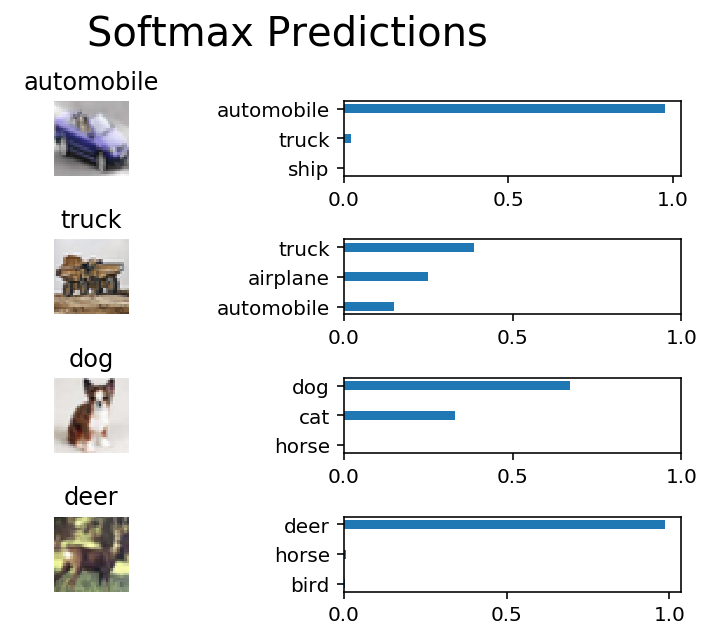

In [46]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.